In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy
import lightkurve as lk
from scipy import *
from astropy import constants as ac
from astropy import units as u

In [2]:
from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 20
rcParams["figure.figsize"] = [8, 5]
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Computer Modern Sans Serif"]
rcParams["text.usetex"] = True
plt.rcParams['axes.linewidth']=1.5

In [3]:
candidates = pd.read_csv('/Users/lupitatovar/Cool-Worlds/targets/candidates_temperature.csv') #candidates_temperature.csv has temp
confirmed = pd.read_csv('/Users/lupitatovar/Cool-Worlds/targets/confirmed_targets.csv') #confirmed_targets.csv has temps

In [4]:
period_conf = confirmed['period'].values           #[days]
radius_conf = confirmed['rade'].values             #[Earth radii]
mass_conf = confirmed['masse'].values              #[Earth mass, estimate using m/r relationship]
eccen_conf = confirmed['eccen'].values             #eccentricity
semi_au_conf = confirmed['semi_au'].values         #semi major axis
log_lum_conf = confirmed['st_log_lum'].values      #log luminosity
lum_conf = 10**log_lum_conf 

In [5]:
period_cand = candidates['Period'].values      #[days]
radius_cand = candidates['Radius'].values        #[Earth radii]
mass_cand = candidates['masse_est'].values     #[Earth mass, estimate using m/r relationship]
#eccen_cand = candidates[''].values        #eccentricity
semi_au_cand = candidates['semi_au'].values        #semi major axis
log_lum_cand = candidates['st_log_lum'].values      #log luminosity
lum_cand = 10**log_lum_cand

In [6]:
#drawing eccentricities from a posterior for cadidates
from scipy.stats import halfnorm
e = halfnorm.rvs(size=50,scale=.32)

(array([2.48128024, 3.30837366, 1.37848902, 1.92988463, 1.37848902,
        1.10279122, 0.82709341, 0.82709341, 0.2756978 , 0.2756978 ]),
 array([0.00494281, 0.077486  , 0.1500292 , 0.22257239, 0.29511559,
        0.36765879, 0.44020198, 0.51274518, 0.58528838, 0.65783157,
        0.73037477]),
 [<matplotlib.patches.Polygon at 0x7f8a926fd290>])

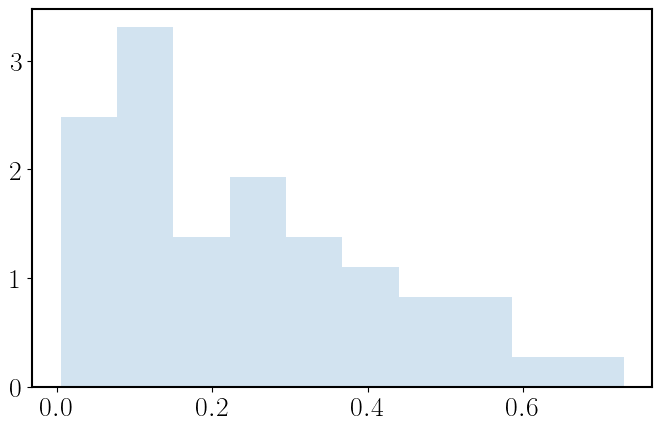

In [7]:
plt.hist(e, density=True, histtype='stepfilled', alpha=0.2)

Calculating Effective Temperature using Equation in Lynnae's latest paper draft

$T_{eff} = (\frac{L  (1-A)}{16  \pi  \sigma  \epsilon  a^2}) ^ \frac{1}{4}$ where

L = luminosity of star

A = planet surface albedo

$\sigma$ = sefan-boltzman constant

$\epsilon$ = emmissivity

a = semi-major axis

Earth like values: A=0.3 ; em = 0.85

Europa-like value: A = 0.55 ; em=0.9

Enceladus-like values: A = 0.81 ; em =1

In [8]:
ac.sigma_sb

<<class 'astropy.constants.codata2018.CODATA2018'> name='Stefan-Boltzmann constant' value=5.6703744191844314e-08 uncertainty=0.0 unit='W / (K4 m2)' reference='CODATA 2018'>

In [9]:
def T_eff(L,A,em,a):
    #Earth like values: A=0.3 ; em = 0.85
    #Europa-like value: A = 0.55 ; em=0.9
    #Enceladus-like values: A = 0.81 ; em =1
    temp = ((L*ac.L_sun * (1-A)) / (16 * np.pi * ac.sigma_sb * em * (a*ac.au)**2)) ** (1/4)      
    return temp

In [11]:
T_eff(lum_conf[1],0.3,0.85,semi_au_conf[1])

<Quantity 261.22422998 K>

Calculating all of the temperatures for the confirmed planets

In [23]:
temps_conf = []

for i in range (0,len(confirmed)):
    temps = T_eff(lum_conf[i],0.3,0.85,semi_au_conf[i])
    temps_conf = np.append(temps_conf,temps.value)
    print (temps.value)

272.059568643201
261.2242299768733
248.74087430285977
269.9643868786179
212.79409226698786
262.88673442598906
223.99370413572356
265.6381614843035
253.92876720428856
185.9296447753966
236.21891068666025
265.3644665531512
258.86300714580506
255.99799533736123


In [25]:
len(temps_conf)

14

Adding those temps to the table

In [34]:
confirmed = confirmed.drop(columns=['masse','radj','Status'])

In [40]:
#confirmed.to_csv('/Users/lupitatovar/Cool-Worlds/targets/confirmed_targets.csv')


Calculating the temperatures for the candidate planets

In [43]:
candidates


,Unnamed: 0,Unnamed: 0.1,name,Insolation,Period,Radius,Jup_Radius,Discovery,Status,st_log_lum,semi_au,masse_est,masse,hostname
0,0,0,KOI-4427.01,0.318849,147.661729,1.797673,0.160363,Kepler,Candidate,-1.195000,0.447412,3.885904,NaN,KIC 4172805
1,1,1,KOI-4848.01,0.160519,384.6961,1.880000,0.167707,Kepler,Candidate,-0.883000,0.903101,4.192848,NaN,KIC 9005321
2,2,2,KOI-7716.01,0.434274,483.36405,1.503482,0.134120,Kepler,Candidate,-0.238000,1.153766,2.868943,NaN,KIC 5097856
3,3,3,KOI-4878.01,0.933017,449.01499,1.020524,0.091037,Kepler,Candidate,0.083000,1.139083,1.045258,NaN,KIC 11804437
4,4,4,KOI-5087.01,0.332875,651.07431,1.141911,0.101865,Kepler,Candidate,-0.160000,1.441648,1.563745,NaN,KIC 4770798
5,5,5,KOI-5227.01,0.598983,371.56492,1.611944,0.143795,Kepler,Candidate,-0.251000,0.967816,3.229114,NaN,KIC 6034834
6,6,6,KOI-5236.01,0.811569,550.86514,1.921435,0.171404,Kepler,Candidate,0.160000,1.334558,4.350944,NaN,KIC 6067545
7,7,7,KOI-5130.01,0.430720,370.05918,1.900000,0.169492,Kepler,Candidate,-0.420683,0.938774,4.268858,NaN,KIC 5166811
8,8,8,KOI-5408.01,0.354582,415.748785,1.710821,0.152616,Kepler,Candidate,-0.421000,1.034289,3.572556,NaN,KIC 7631138
9,9,9,KOI-5789.01,0.319386,383.26217,1.532865,0.136741,Kepler,Candidate,-0.545000,0.944805,2.964783,NaN,KIC 10387792


In [41]:
temps_cand = []

for i in range (0,len(candidates)):
    temps2 = T_eff(lum_cand[i],0.3,0.85,semi_au_cand[i])
    temps_cand = np.append(temps_cand,temps2.value)
    print (temps2.value)

199.23977084049827
167.82687271862247
215.23888251075343
260.58656472565906
201.39559835606468
233.2561968946791
251.65812969811856
214.7971099460044
204.6014945316859
199.32357292442475
211.33135675633457
201.21655232652557
227.82427308309596
257.60874847993335
264.3040725782252
192.76871610765878
165.34260824022047
218.12746830226442
252.476476333851
182.80216201434962
226.9099033033297
189.8805471704376
264.7987133091766
243.8260981336231
242.0505388047647
155.19528414023867
218.16750412504285
243.7188223193888
259.2059809138041
264.90896885696446
193.15261390365248
262.91890933986804
211.02611782635577
234.85147078400743
196.42256608555758
265.15953971585265
257.85285321989574
214.61170345360387
265.7944053475298
208.6971071103148
241.7956005539192
228.75948101997614
187.27258759498767
244.75369398352447
nan
nan
156.86401378223292


In [42]:
len(temps_cand)

47

In [45]:
candidates= candidates.drop(columns=['masse','Jup_Radius','Status'])

In [47]:
#candidates

In [49]:
#candidates.insert(5,'T_eff',temps_cand)
#candidates

In [50]:
#candidates.to_csv('/Users/lupitatovar/Cool-Worlds/targets/candidates_temperature.csv')